<a href="https://colab.research.google.com/github/mathrhino/pytorch/blob/main/torch_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch 
from torchvision import datasets, transforms
from torchvision.utils import save_image
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
import os
from glob import 

%matplotlib inline

In [6]:
test_batch_size=32

In [7]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=True, download=True,
                   transform=transforms.Compose([
                                                  transforms.ToTensor(),
                                                 
                   ])),
                   batch_size=1,
                   shuffle=True
)

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw


Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
test_loader= torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=False,
                   transform=transforms.Compose([
                                                 transforms.ToTensor(),
                                                 transforms.Normalize((0.5,),(0.5))
                   ])),
    batch_size=test_batch_size,
    shuffle=True
)

In [9]:
images, labels = next(iter(train_loader))

##pytorch와 tensor의 shape 순서의 의미가 다르다##
###[batch_size, channel, height, witdh]=Pytorch [batch_size, height, width, channel]= Tensorflow###

In [10]:
images.shape

torch.Size([1, 1, 28, 28])

In [11]:
labels.shape

torch.Size([1])

In [12]:
images[0].shape

torch.Size([1, 28, 28])

In [13]:
torch_image=torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [14]:
image=torch_image.numpy()
image.shape

(28, 28)

In [15]:
label=labels[0].numpy()

In [16]:
label.shape

()

In [17]:
label

array(9)

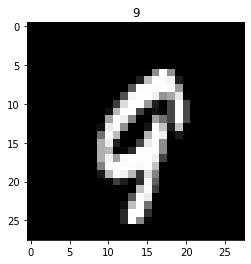

In [18]:
plt.title(label)
plt.imshow(image,'gray')
plt.show()

In [19]:
import torch.nn as nn # weight가 있는 내용 
import torch.nn.functional as F #pooling, activation function 같이 weight가 없는 것이 담겨있음
import torch.optim as optim

##Layer Convolution##
###in_channels: 전달 받을 channel 수###
###out_channels: 전달 할 channel 수###
###kernel_size: kernel, weight의 사이즈###


In [20]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [21]:
layer=nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [22]:
weight= layer.weight
weight.shape 

torch.Size([20, 1, 5, 5])

In [23]:
weight=weight.detach().numpy()
#weight는 학습 가능한 상태이기 때문에 바로 numpy로 뽑아지지 않아서 detach_method를 사용하여 그래프에서 잠깐 제거하여 gradient 영향을 받지 않게


In [24]:
weight

array([[[[-0.08065927,  0.1732686 , -0.05019116, -0.06926129,
          -0.14361744],
         [-0.17521004,  0.10293653,  0.09069438,  0.16586201,
           0.09629693],
         [ 0.14093883,  0.06530352, -0.00305333, -0.10463712,
           0.10625043],
         [ 0.02099929, -0.04935692, -0.18353689, -0.17435972,
          -0.06948221],
         [ 0.01602595, -0.0266058 ,  0.02958579,  0.01460428,
          -0.17525943]]],


       [[[-0.06454332,  0.13114421,  0.04184876,  0.16149504,
           0.12582795],
         [ 0.08886649, -0.1690567 , -0.17686175, -0.03681948,
          -0.13579528],
         [ 0.17351316, -0.07004573,  0.1561722 , -0.03478301,
           0.02451527],
         [ 0.09596767,  0.10924897,  0.03018513,  0.06622608,
          -0.09140453],
         [ 0.12137671,  0.1352442 ,  0.00484457, -0.16366939,
           0.01435647]]],


       [[[-0.03947482,  0.12688291,  0.02346304,  0.14598309,
          -0.01708918],
         [-0.13350704,  0.19916926, -0.1407984

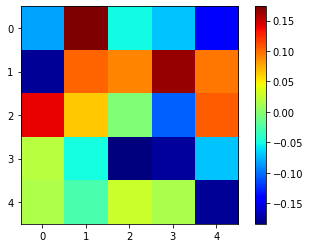

In [25]:
plt.imshow(weight[0,0,:,:],'jet')
plt.colorbar()
plt.show()

In [26]:
output_data = layer(images)

In [27]:
output_data =output_data.data

In [28]:
output = output_data.cpu().numpy()

In [29]:
output.shape

(1, 20, 24, 24)

In [30]:
image_arr = images.numpy()
image_arr.shape

(1, 1, 28, 28)

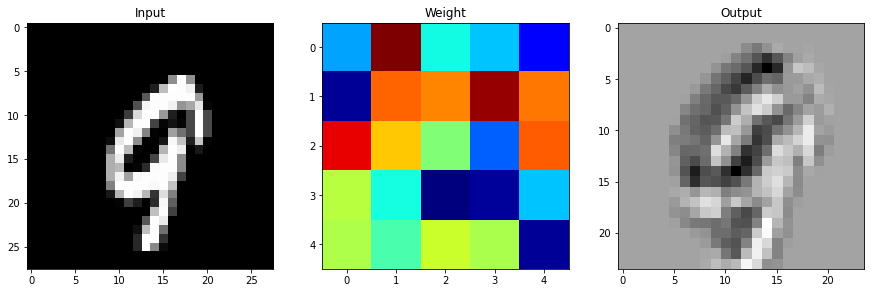

In [31]:
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.title('Input')
plt.imshow(np.squeeze(image_arr), 'gray')
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:], 'jet')
plt.subplot(133)
plt.title('Output')
plt.imshow(output[0,0,:,:], 'gray')
plt.show()

In [32]:
images.shape

torch.Size([1, 1, 28, 28])

In [33]:
pool = F.max_pool2d(images, 2, 2)
pool.shape

torch.Size([1, 1, 14, 14])

In [34]:
#MaxPool Layer는 Weight가 없기 떄문에 바로 numpy()가 가능
pool_arr=pool.numpy()
pool_arr.shape

(1, 1, 14, 14)

In [35]:
image_arr.shape

(1, 1, 28, 28)

In [36]:
image_arr.shape

(1, 1, 28, 28)

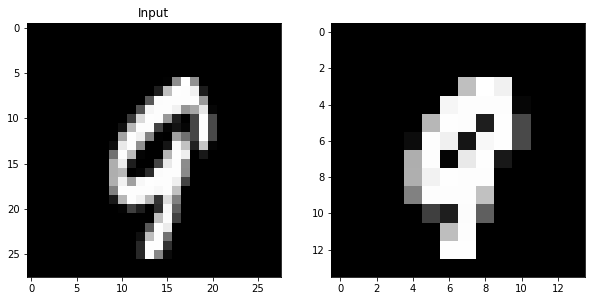

In [37]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.title("Input")
plt.imshow(np.squeeze(image_arr),'gray')
plt.subplot(122)
plt.imshow(np.squeeze(pool_arr), 'gray')
plt.show()

In [38]:
flatten=images.view(1, 28*28)
flatten.shape

torch.Size([1, 784])

In [39]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [40]:
lin

tensor([[ 0.2591, -0.2010, -0.1502,  0.1914, -0.0757, -0.2041,  0.2765,  0.2577,
         -0.2651, -0.1333]], grad_fn=<AddmmBackward>)

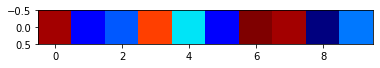

In [41]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.show()

In [42]:
with torch.no_grad():
  flatten = images.view(1,28*28)
  lin = nn.Linear(784,10)(flatten)
  softmax = F.softmax(lin, dim=1)

In [43]:
softmax

tensor([[0.0964, 0.1078, 0.0919, 0.0922, 0.0756, 0.1257, 0.1043, 0.0915, 0.0923,
         0.1223]])

In [44]:
np.sum(softmax.numpy())

0.99999994

##Layer##

In [51]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1=nn.Conv2d(1,20,5,1)
    self.conv2=nn.Conv2d(20,50,5,1)
    self.fc1=nn.Linear(4*4*50,500)
    self.fc2=nn.Linear(500, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2,)
    
    print(x.shape)
    x=x.view(-1,4*4*50)
    x=F.relu(self.fc1(x))
    x=self.fc2(x)
    return F.log_softmax(x, dim=1)

In [49]:
model = Net()

In [50]:
result = model.forward(images)

torch.Size([1, 50, 4, 4])


In [52]:
result

In [63]:
model.conv1

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

##Optimization##

In [54]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [55]:
  model = Net().to(device)

In [56]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum =0.5)

In [57]:
params = list(model.parameters())
for i in range(8):
  print(params[i].size())
  #Weight, Bias 순서대로 보여줌

torch.Size([20, 1, 5, 5])
torch.Size([20])
torch.Size([50, 20, 5, 5])
torch.Size([50])
torch.Size([500, 800])
torch.Size([500])
torch.Size([10, 500])
torch.Size([10])
